# Efficiency of gradient descent methods

Implementing Random Coordinate method for the Quadratic function 0.5x^TAx

[[2 1]
 [1 3]]
[1. 1.]
0
x is [-0.6  0.2]
function is 3.5
alpha is 0.7200000000000001
1
x is [ 0.4168 -0.7496]
function is 1.26
alpha is 0.5248800000000001
1
x is [-0.35614995  0.43075014]
function is 1.6526102400000016
alpha is 0.47239200000000015
0
x is [-0.0331296 -0.3165648]
function is 0.3798684434340316
alpha is 0.42515280000000016
0
x is [-0.00495932 -0.01904446]
function is 0.2651455202595294
alpha is 0.3826375200000002
0
x is [-0.00116408 -0.0030617 ]
function is 0.2762068987388348
alpha is 0.3443737680000002
0
x is [-0.00036232 -0.0007632 ]
function is 0.2778184593645758
alpha is 0.30993639120000016
1
x is [0.297245   0.03023471]
function is 0.2781625911757587
alpha is 0.27894275208000013
1
x is [0.02180096 0.00493345]
function is 0.0013603830032947613
alpha is 0.2510484768720001
0
x is [-0.0001804  -0.00027136]
function is 3.4852177974939295e-05
alpha is 0.2259436291848001
1
x is [0.00381877 0.00158941]
function is 3.56509409736053e-05
alpha is 0.2033492662663201
1
x is [0.0

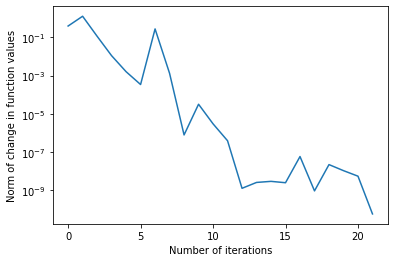

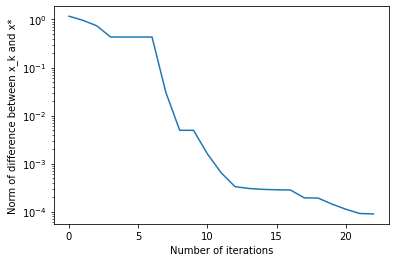

Optimal x: [-3.33153684e-05  8.37390398e-05]
Optimal value of f(x): 8.83845699383209e-09
Number of iterations: 22
Step size: 0.9
Gradient is: [1.71083031e-05 2.17901751e-04]
oracle_calls_grad 49
oracle_calls 97


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm
# Define the function and its gradient
oracle_calls = 0
def f(x, A):
    global oracle_calls
    oracle_calls += 1
    return 0.5 * np.dot(x.T, np.dot(A, x))

oracle_calls_grad = 0
def grad_f(x, A):
    global oracle_calls_grad
    oracle_calls_grad += 1
    return np.dot(A, x)

# Using Armijo method to find the suitable step size alpha,take several parameter as c = 
#0.1, alpha = 1 and gamma 0.9
def Armijo(x, pk, f, grad_f, c=0.1, alpha=0.8, gamma=0.9):
    while np.all(f(x + alpha * pk,A) >= f(x,A) + c * alpha * np.dot(grad_f(x,A), pk)):
        alpha = gamma * alpha
        #print(alpha)
    return alpha

#Implementing Randomcoordinate descent method by choosing a randoom coordinate between 0 to n
def RandomCoordinateDescent(x0, f, grad_f, A, c=0.1, alpha=0.8, gamma=0.9, tol=10e-6, max_iter=1000):
    x = x0.copy()
    x_vals, f_vals = [], []
    iter_vals, x_diff_vals = [], []

    # Implement Random Coordinate Descent with Armijo line search
    iter_count = 0
    i = 0
    while True:
        #i = np.random.choice(np.arange(0, n)) #create array of integers from 0 to n-1
        i = np.random.randint(0, n) #select a single random coordinate
        print(i)
        x_i = x[i]
        pk = -grad_f(x[i], A)
        alpha = Armijo(x, pk, f, grad_f, c, alpha, gamma) #update the step size from Armijo
        x_i_new = x_i + alpha * pk[i] #Updating new x
        #print("x_i is", x_i)
        print("x is",x_i_new)
        print("function is", f(x,A))
        x[i] = x_i_new[i]
        function_f = f(x, A)
        f_vals.append(function_f)
        x_vals.append(x.copy())
        #check the convergence taking the norm of change of x values
        if np.linalg.norm(x_i - x_i_new) < tol:  
            break
        #if np.linalg.norm(f(x_i,A) - f(x_i_new,A)) < tol:  #check the convergence taking the norm of change of x values
            #break
        alpha = gamma * alpha
        iter_vals.append(iter_count)
        print("alpha is", alpha)
        # Update iteration count
        iter_count += 1
        
        # Calculate the norm of the difference between the current x value and the optimal x value
        x_diff_vals.append(norm(x - np.linalg.inv(A) @ np.zeros(n)))
        
    # Plot the convergence of the function values
    f_diff = np.abs(np.diff(f_vals))
    #plt.plot(np.linalg.norm(x_i-x_i_new), iter_count)
    plt.plot(iter_vals, f_diff)
    plt.xlabel('Number of iterations')
    plt.ylabel('Norm of change in function values')
    plt.yscale('log')
    plt.show()
    
    x_diff_vals.append(norm(x - np.linalg.inv(A) @ np.zeros(n)))
    plt.plot(iter_vals + [iter_count], x_diff_vals)
    plt.xlabel('Number of iterations')
    plt.ylabel('Norm of difference between x_k and x*')
    plt.yscale('log')
    plt.show()
    
    # Print the result
    print("Optimal x:", x.flatten())
    print("Optimal value of f(x):", f(x, A))
    print("Number of iterations:", iter_count)
    print("Step size:", gamma)
    print("Gradient is:", grad_f(x, A))
    print("oracle_calls_grad", oracle_calls_grad)
    print("oracle_calls",oracle_calls)
    
# Define the parameters
n = 2
A = np.array([[2, 1], [1, 3]])
#A = np.dot(A, A.T)
print(A)

# Run the optimization
x0 = np.ones(n)
#g = A @ x0
#print('g',g)
print(x0)
RandomCoordinateDescent(x0, f, grad_f, A)


Implementing Random Coordinate method for thefunction Σx_i^2 + 0.5 norm(Ax-b)^(2)

0
x is -0.2802021728386954
function is 13.809999999999999
alpha is 0.0984770902183612
0
x is -0.5498900342868738
function is 4.567846189480473
alpha is 0.08862938119652508
1
x is 0.21558124544521695
function is 4.083843513179761
alpha is 0.07976644307687257
1
x is 0.2604478935494168
function is 0.8331829345149213
alpha is 0.07178979876918531
1
x is 0.26217626517701637
function is 0.8200246531511683
alpha is 0.06461081889226679
0
x is -0.3665019866434083
function is 0.8200009654393678
alpha is 0.05814973700304011
0
x is -0.2761005109440689
function is 0.41719081561208116
alpha is 0.0523347633027361
0
x is -0.2278571616452643
function is 0.3052532299840355
alpha is 0.04710128697246249
1
x is 0.1864925337212703
function is 0.2689274097814589
alpha is 0.042391158275216244
1
x is 0.1568770278790928
function is 0.1816847301945604
alpha is 0.03815204244769462
0
x is -0.18548493132280314
function is 0.16625707849525906
alpha is 0.03433683820292516
0
x is -0.1575344229507441
function is 0.12548

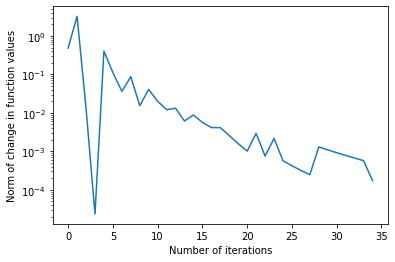

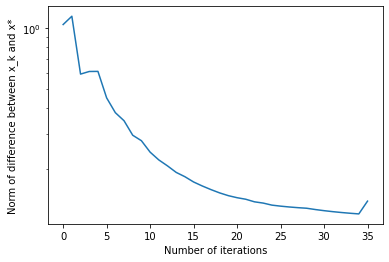

Optimal x: [-0.08145212  0.08775122]
Optimal value of f(x): 0.03301975943954974
Number of iterations: 35
Step size: 0.9
Gradient is: [-0.43140871  0.24575407]
oracle_calls_grad 94
oracle_calls 187


In [5]:

import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm

# Define the function and its gradient
oracle_calls = 0
def f(x, A, b):
    global oracle_calls
    oracle_calls += 1
    return np.sum(x**2) + 0.5 * norm(A @ x - b)**2

oracle_calls_grad = 0
def grad_f(x, A, b):
    global oracle_calls_grad
    oracle_calls_grad += 1
    return 2 * x + A.T @ (A @ x - b)

# Using Armijo method to find the suitable step size alpha,take several parameter as c = 
#0.1, alpha = 1 and gamma 0.9
def Armijo(x, pk, f, grad_f, A, b, c=0.1, alpha=1, gamma=0.9):
    while (f(x + alpha * pk,A,b) >= f(x,A,b) + c * alpha * np.dot(grad_f(x,A,b), pk)):
        alpha = gamma * alpha
    return alpha

#Implementing Randomcoordinate descent method by choosing a randoom coordinate between 0 to n
def RandomCoordinateDescent(x0, f, grad_f, A, b, c=0.1, alpha=1, gamma=0.9, tol=10e-4, max_iter=1000):
    x = x0.copy()
    x_vals, f_vals = [], []
    iter_vals, x_diff_vals = [], []

    # Implement Random Coordinate Descent with Armijo line search
    iter_count = 0
    i = 0
    while True:
        #i = np.random.choice(np.arange(0, n)) #create array of integers from 0 to n-1
        i = np.random.randint(0, n) #select a single random coordinate
        print(i)
        x_i = x[i]
        pk = -grad_f(x, A,b)
        alpha = Armijo(x, pk, f, grad_f, A, b, c, alpha, gamma) #update the step size from Armijo
        x_i_new = x_i + alpha * pk[i] #Updating new x
        #print("x_i is", x_i)
        print("x is",x_i_new)
        print("function is", f(x,A,b))
        x[i] = x_i_new
        function_f = f(x, A,b)
        f_vals.append(function_f)
        x_vals.append(x.copy())
        
        
        if np.linalg.norm(x_i - x_i_new) < tol:  #check the convergence taking the norm of change of x values
            break
       
        alpha = gamma * alpha
        iter_vals.append(iter_count)
        print("alpha is", alpha)
        iter_count += 1
        
        # Calculate the norm of the difference between the current x value and the optimal x value
        x_diff_vals.append(norm(x - np.linalg.inv(A) @ np.zeros(n)))
        
        # Check for maximum iteration count
        if iter_count >= max_iter:
            break


        
    # Plot the convergence of the function values
    f_diff = np.abs(np.diff(f_vals))
    plt.plot(iter_vals, f_diff)
    plt.xlabel('Number of iterations')
    plt.ylabel('Norm of change in function values')
    plt.yscale('log')
    plt.show()
    
    x_diff_vals.append(norm(x - np.linalg.inv(A.T @ A) @ (A.T @ b)))
    plt.plot(iter_vals + [iter_count], x_diff_vals)
    plt.xlabel('Number of iterations')
    plt.ylabel('Norm of difference between x_k and x*')
    plt.yscale('log')
    plt.show()
    
    # Print the result
    print("Optimal x:", x.flatten())
    print("Optimal value of f(x):", f(x, A,b))
    print("Number of iterations:", iter_count)
    print("Step size:", gamma)
    print("Gradient is:", grad_f(x, A,b))
    print("oracle_calls_grad", oracle_calls_grad)
    print("oracle_calls",oracle_calls)
    
# Define the parameters
n = 2
A = np.array([[2, 1], [1, 3]])
b = np.array([0.1, 0.1])

# Run the optimization
x0 = np.ones(n)
RandomCoordinateDescent(x0, f, grad_f, A, b)

    

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy as dcopy
from numpy.linalg import norm

In [8]:
# function to be minimized

def func(x, A):
    f = 0.5 * x.T @ A @ x
    return f

# gradient of the function

def grad(A, x):
    return A @ x

# function that is needed to calculate the coefficient gamma

def quadro(a, b, o, n):
    
    B = (((o * a**2) / ( n * b**2)) - (1 / n))
    C = - (a**2 / b**2)
    A = 1
    
    D = B**2 - 4 * A * C
    
    g1 = (-B + D**0.5) / (2 * A)
    g2 = (-B - D**0.5) / (2 * A)
    
    return np.array([g1, g2])

In [9]:
# n - number of chanks
# f - function to be minimized
# grad - of the function
# A - matrix
# x - initial point 

def ACDM(x, A, sigma, f, grad, n, max_iter=5000, tol=1e-5):
    
    x_vals = []
    f_vals = []
    i_vals = []
    f_vals_2 = []
    
    X_prev = dcopy(x)  # deep copy of initial x
    v_k = x  
    x = np.array(np.split(x, n))  # split initial x into chanks
    A_split = np.array(np.split(A, n))  # split initial matrix into small matrixes
    a_k = 1 / n
    b_k =  2
    
    num_in_chank = int(len(X_prev) / n) # number of x in the one chank
    I = np.identity(len(X_prev))
    
    for k in range(max_iter): 
        
        #1
        gamma_k = max(quadro(a_k, b_k, sigma, n))
        
        if gamma_k < 1/n:
            gamma_k = 1/n
            
        alpha_k = (n - (gamma_k * sigma)) / (gamma_k * ((n**2) - sigma))
        beta_k = 1 - ((1 / n) * gamma_k * sigma)
        
        #2
        y_k = alpha_k * v_k + (1 - alpha_k) * X_prev 

        #3
        i_k = np.random.choice(np.arange(0, n))  # randomly choose which chank will be updated
        L_ik = np.linalg.norm(A[i_k])  
        U_ik = I[:, i_k * num_in_chank : (i_k + 1) * num_in_chank]  # take part of the matrix
        f_dash_i = grad(A_split[i_k], y_k)  # calculate derivative of y_k
        T_ik = y_k - (1/L_ik) * U_ik @ f_dash_i  
        x_next = T_ik
    
        v_next = beta_k * v_k + (1-beta_k)*y_k - (gamma_k/L_ik) * U_ik @ f_dash_i
        
        #4
        b_next = b_k / np.sqrt(beta_k)
        a_next = gamma_k * b_next
        
        f_prev = f(X_prev, A)
        f_next = f(x_next, A)    
        
        
        if k == max_iter or norm(X_prev - x_next) < tol:
            break

        x_vals.append(x_next)
        f_vals.append(f_next)
        f_vals_2.append(norm(f_prev - f_next))
        i_vals.append(k)
        
        v_k = v_next
        a_k = a_next
        b_k = b_next
        X_prev = x_next
        
    f_vals = norm(f_vals - f_next, axis=1)
    x_vals = norm(np.array(x_vals) - x_next, axis=1)

    return x_vals, f_vals, f_vals_2, len(i_vals), x_next, f_next


In [10]:
# initialize N (dimension of the matrix) and the number of chunks N_chank (N must be a multiple of N_chank)
N = 5
N_chank = N
# create positive deifinite matrix
A = np.random.random((N, N))
A = (A @ A.T)/10
# create initial x
x = np.array([[1]]*N)
# create identity matrix
I = np.identity(N)
# calculate sigma
SIGMA = min(np.linalg.eigvals(A)) / max(np.linalg.eigvals(A))
print(SIGMA)

0.0013465011120152258


x_min: [-3.21654365e-05] [-5.78238453e-06] [-4.11666276e-05] [2.33343628e-05] [4.84586713e-05]
f_min: [[2.23515025e-12]]
number of iterations: 906


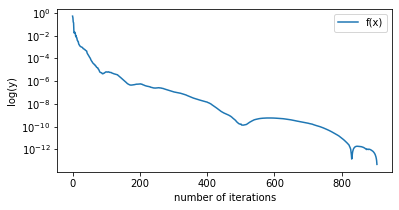

In [12]:
x_values, f_values, f_values_2, num_it, x_min, f_min = ACDM(x, A, SIGMA, func, grad, n = N, max_iter=100000,tol=1e-6)

print('x_min:', *x_min)
print('f_min:', f_min)
print('number of iterations:', num_it)
fig, ax = plt.subplots(figsize=(6,3))
plt.ylabel('log(y)')
plt.xlabel('number of iterations')
plt.yscale('log')

# ax.plot(num_it, x_values, label= 'x')
ax.plot(range(num_it), f_values, label = 'f(x)')

ax.legend()
plt.show() 

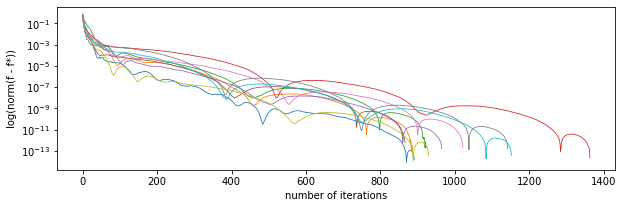

minimum number of iterations: 868
maximum number of iterations: 1364


In [13]:
# distribution of convergence curves
fs = []
fs2 = []
num_iters = []
for i in range(10):
    x_, f_, f_2, num_it_, x_min_, f_min_ = ACDM(x, A, SIGMA, func, grad, n = N, max_iter=100000,tol=1e-6)
    fs.append(f_)
    fs2.append(f_2)
    num_iters.append(num_it_)
    
fig, ax = plt.subplots(figsize=(10,3))
plt.ylabel('log(norm(f - f*))')
plt.xlabel('number of iterations')
plt.yscale('log')

for i in range(10):
    ax.plot(range(num_iters[i]), fs[i], lw=0.8)

plt.show() 

print('minimum number of iterations:', min(num_iters))
print('maximum number of iterations:', max(num_iters))

# ниже эксперименты 

### хэви бол


L = 0.4379958046572441 
m = 0.0007261745172641711 
q = 0.9966895913506294
number of iterations: 331


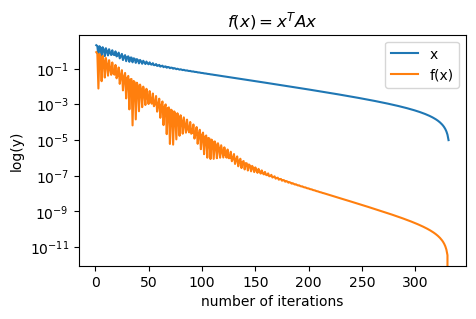

In [92]:
# eigenvalues of matrix

eigvals = np.linalg.eigvals(A)
# print('Eigenvalues of matrix:', *eigvals, sep='\n')

# maximum and minimum eigenvalues

L = max(eigvals)
m = min(eigvals)
q = (L - m) / (L + m)
print(f'\nL = {L} \nm = {m} \nq = {q}')

def heavy_ball(x_0, tol=10e-6, beta=0.9, max_iter=100000):
    
    alpha = 1/L
    x_list, f_list = [], []
    i = 0
    my_grd= grad(A, x_0)
    x_prev = x_0 - np.dot(alpha, my_grd)
    
    while True:
        my_grd= grad(A, x_prev)
        x_next = x_prev - np.dot(alpha, my_grd) + beta * (x_prev - x_0)
        f_next = func(x_next, A)
        if np.linalg.norm(x_prev-x_next) < tol or i == max_iter:
            break
            
        x_list.append(x_next) 
        f_list.append(f_next)

        x_0 = x_prev
        x_prev = x_next
        i += 1
    
    
    x_min = x_next
    f_min = f_list[-1]
    x_list = np.linalg.norm((np.array(x_list) - x_min), axis=1)
    f_list = np.linalg.norm((f_list - f_min), axis=1)


    return x_list, f_list, x_min, f_min, i

# x = np.array([[1], [1], [1], [1], [1]])
x_val_hb, f_val_hb, x_minimum_hb, f_minimum_hb, num_of_iter_hb= heavy_ball(x)

# plotter

def plotter(it, x_values, f_values, f_plot='both', fig_size=(3,3)):
    
    iters = np.linspace(1, it, it)
    
    
    fig, ax = plt.subplots(figsize=fig_size)
    plt.title('$f(x)=x^TAx$')
    plt.ylabel('log(y)')
    plt.xlabel('number of iterations')
    plt.yscale('log')
    
    if f_plot == 'both':
        ax.plot(iters, x_values, label= 'x')
        ax.plot(iters, f_values, label = 'f(x)')
    elif f_plot == 'x':
        ax.plot(iters, x_values, label= 'x')
    elif f_plot == 'f':
        ax.plot(iters, f_values, label = 'f(x)')
        
    ax.legend()
    plt.show() 
print('number of iterations:', num_of_iter_hb)   
# printer(x_minimum, f_minimum, num_of_iter, calls_func, calls_grad)
plotter(num_of_iter_hb, x_val_hb, f_val_hb, fig_size=(5, 3))